In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from tensorflow.keras import datasets, layers, models
from sklearn import svm

In [15]:
type(digits.data[0])

numpy.ndarray

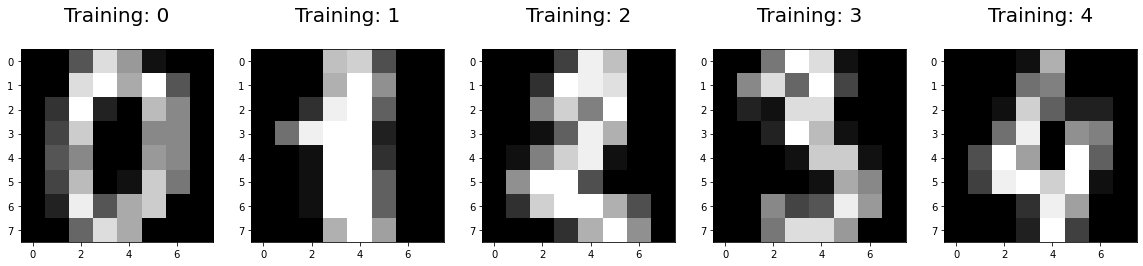

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logisticRegr = LogisticRegression()

In [50]:
logisticRegr.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [52]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


!!! Classifier !!!

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
np.random.seed(0)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = 10)
boosting.fit(x_train,y_train)

NameError: name 'np' is not defined

In [ ]:
boosting.predict(x_train)

In [ ]:
boosting.score(x_test, y_test)

In [ ]:
target = digits.target
y = digits.target
x = digits.data

In [ ]:
print(len(x))
print(x.shape)

In [3]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [33]:
input_size = 784
hidden_sizes = [128, 128, 128]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [34]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [35]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [36]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) 
loss = criterion(logps, labels) 

In [37]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-1.2232e-03, -1.2232e-03, -1.2232e-03,  ..., -1.2232e-03,
         -1.2232e-03, -1.2232e-03],
        [ 1.3797e-05,  1.3797e-05,  1.3797e-05,  ...,  1.3797e-05,
          1.3797e-05,  1.3797e-05],
        [-1.5356e-03, -1.5356e-03, -1.5356e-03,  ..., -1.5356e-03,
         -1.5356e-03, -1.5356e-03],
        ...,
        [-5.1895e-04, -5.1895e-04, -5.1895e-04,  ..., -5.1895e-04,
         -5.1895e-04, -5.1895e-04],
        [-1.7512e-04, -1.7512e-04, -1.7512e-04,  ..., -1.7512e-04,
         -1.7512e-04, -1.7512e-04],
        [-4.5490e-04, -4.5490e-04, -4.5490e-04,  ..., -4.5490e-04,
         -4.5490e-04, -4.5490e-04]])


In [38]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
    
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        
        loss.backward()
        
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.8510261819576785
Epoch 1 - Training loss: 0.2929256617911716
Epoch 2 - Training loss: 0.21634667900516025
Epoch 3 - Training loss: 0.16826276433294707
Epoch 4 - Training loss: 0.1369950901319795
Epoch 5 - Training loss: 0.1161327997087511
Epoch 6 - Training loss: 0.10037316486481697
Epoch 7 - Training loss: 0.08752781556827872
Epoch 8 - Training loss: 0.07923033611247264
Epoch 9 - Training loss: 0.07054685455248523
Epoch 10 - Training loss: 0.06469027821703363
Epoch 11 - Training loss: 0.05952892599424828
Epoch 12 - Training loss: 0.05409548648703558
Epoch 13 - Training loss: 0.048961792829886344
Epoch 14 - Training loss: 0.04553361787725844
Epoch 15 - Training loss: 0.04382690684030901
Epoch 16 - Training loss: 0.03969702072742421
Epoch 17 - Training loss: 0.03657231243937385
Epoch 18 - Training loss: 0.03115809418614517
Epoch 19 - Training loss: 0.03017142942381416

Training Time (in minutes) = 3.5786781628926594


In [39]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9791
